Le but est de compléter les valeurs manquantes de la dureté (Hardness, HV) en utilisant une formule physique bien établie dérivée d’études métallurgiques (Pavlina & Van Tyne, 2008).

Cette relation exprime une corrélation linéaire entre la dureté Vickers (HV) et la limite d’élasticité (Yield Strength) pour les aciers.
Ainsi, si la dureté est inconnue mais que la résistance (Yield Strength) est disponible, on peut estimer la dureté de manière fiable.

Source : Pavlina, E.J. & Van Tyne, C.J. (2008).
Correlation of Yield Strength and Tensile Strength with Hardness for Steels.
Journal of Materials Engineering and Performance, Vol. 17(6), pp. 888–893.
DOI: 10.1007/s11665-008-9225-5

Formule extraite de l’article :

Yield Strength (MPa)=−90.7+2.876×HV
Yield Strength (MPa)=−90.7+2.876×HV

En isolant HV :

HV=Yield Strength+90.72.876
HV=
2.876
Yield Strength+90.7
	​


On commence par charger le fichier CSV contenant toutes les données déjà nettoyées et complétées partiellement
Ce fichier contient notamment la colonne "Yield strength (MPa)", dont on va se servir pour estimer la dureté.

In [19]:
import pandas as pd

df = pd.read_csv(r"..\..\welddatabase\weld_data_yield_strength_predicted_ML.csv")

print("✅ Dataset chargé avec succès !")
print("Nombre de lignes :", len(df))
print("Colonnes disponibles :", list(df.columns))


✅ Dataset chargé avec succès !
Nombre de lignes : 1652
Colonnes disponibles : ['Carbon_%', 'Silicon_%', 'Manganese_%', 'Sulphur_%', 'Phosphorus_%', 'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%', 'Cobalt_%', 'Tungsten_%', 'Oxygen_weight%', 'Titanium_weight%', 'Nitrogen_weight%', 'Aluminium_weight%', 'Boron_weight%', 'Niobium_weight%', 'Tin_weight%', 'Arsenic_weight%', 'Antimony_weight%', 'Interpass_Temp_C', 'PWHT_Temp_C', 'PWHT_Time_hours', 'Yield_Strength_MPa', 'UTS_MPa', 'Elongation_%', 'Reduction_Area_%', 'Charpy_Temp_C', 'Charpy_Energy_J', 'Hardness_kg_mm2', 'FATT_50%', 'Primary_Ferrite_%', 'Ferrite_2nd_Phase_%', 'Acicular_Ferrite_%', 'Martensite_%', 'Ferrite_Carbide_%', 'Electrode_Polarity_+', 'Electrode_Polarity_-', 'Electrode_Polarity_0', 'Power_W', 'Weld_Type_FCA', 'Weld_Type_GMAA', 'Weld_Type_GTAA', 'Weld_Type_MMA', 'Weld_Type_NGGMA', 'Weld_Type_NGSAW', 'Weld_Type_SA', 'Weld_Type_SAA', 'Weld_Type_ShMA', 'Weld_Type_TSA', 'Heat_Input_J_mm', 'Yield strength (p

On va appliquer la relation empirique de Pavlina & Van Tyne (2008) pour estimer la dureté Vickers (HV) à partir de la limite d’élasticité (Yield Strength).
Chaque ligne du tableau sera traitée :

Si la valeur de Yield Strength est disponible → on calcule HV,

Sinon → on laisse la cellule vide (NaN).

In [20]:
df.drop(columns=['Yield strength (physique)'], inplace=True)


In [21]:
df.columns

Index(['Carbon_%', 'Silicon_%', 'Manganese_%', 'Sulphur_%', 'Phosphorus_%',
       'Nickel_%', 'Chromium_%', 'Molybdenum_%', 'Vanadium_%', 'Copper_%',
       'Cobalt_%', 'Tungsten_%', 'Oxygen_weight%', 'Titanium_weight%',
       'Nitrogen_weight%', 'Aluminium_weight%', 'Boron_weight%',
       'Niobium_weight%', 'Tin_weight%', 'Arsenic_weight%', 'Antimony_weight%',
       'Interpass_Temp_C', 'PWHT_Temp_C', 'PWHT_Time_hours',
       'Yield_Strength_MPa', 'UTS_MPa', 'Elongation_%', 'Reduction_Area_%',
       'Charpy_Temp_C', 'Charpy_Energy_J', 'Hardness_kg_mm2', 'FATT_50%',
       'Primary_Ferrite_%', 'Ferrite_2nd_Phase_%', 'Acicular_Ferrite_%',
       'Martensite_%', 'Ferrite_Carbide_%', 'Electrode_Polarity_+',
       'Electrode_Polarity_-', 'Electrode_Polarity_0', 'Power_W',
       'Weld_Type_FCA', 'Weld_Type_GMAA', 'Weld_Type_GTAA', 'Weld_Type_MMA',
       'Weld_Type_NGGMA', 'Weld_Type_NGSAW', 'Weld_Type_SA', 'Weld_Type_SAA',
       'Weld_Type_ShMA', 'Weld_Type_TSA', 'Heat_Input_J_mm']

In [22]:
# Fonction de prédiction basée sur Pavlina & Van Tyne (2008)
def predict_hardness_physical(row):
    if not np.isnan(row['Yield_Strength_MPa']):
        return (row['Yield_Strength_MPa'] + 90.7) / 2.876
    else:
        return np.nan

# Application de la formule
df['Hardness_pred_phys'] = df.apply(predict_hardness_physical, axis=1)

print("✅ Colonne 'Hardness_pred_phys' créée avec les valeurs physiques estimées.")


✅ Colonne 'Hardness_pred_phys' créée avec les valeurs physiques estimées.


In [27]:
# --- 4️⃣ Évaluation de la corrélation ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# --- 4️⃣ Évaluation de la corrélation ---
# Supprimer les lignes contenant des NaN dans les colonnes utilisées
df_eval = df[['Hardness_kg_mm2', 'Hardness_pred_phys']].dropna()

r2 = r2_score(df_eval['Hardness_kg_mm2'], df_eval['Hardness_pred_phys'])
mae = mean_absolute_error(df_eval['Hardness_kg_mm2'], df_eval['Hardness_pred_phys'])
rmse = np.sqrt(mean_squared_error(df_eval['Hardness_kg_mm2'], df_eval['Hardness_pred_phys']))

print("\n📘 Résumé de la vérification :")
print(f"R² : {r2:.4f}")
print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"Nombre de points utilisés : {len(df_eval)} / {len(df)}")



📘 Résumé de la vérification :
R² : 0.3608
MAE : 25.2489
RMSE : 48.1023
Nombre de points utilisés : 138 / 1652


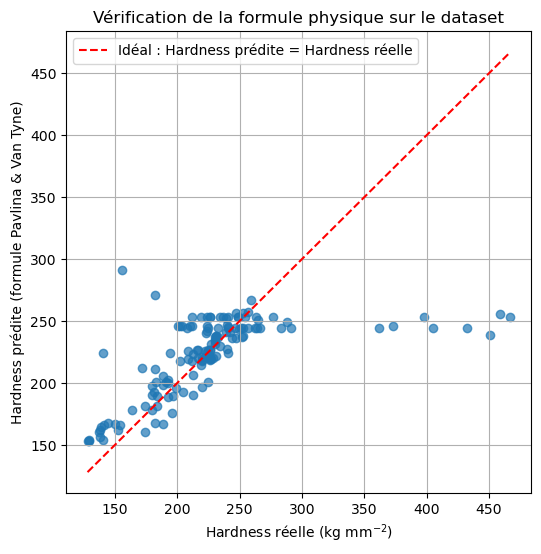

In [26]:
# --- 5️⃣ Visualisation graphique ---
plt.figure(figsize=(6,6))
plt.scatter(df['Hardness_kg_mm2'], df['Hardness_pred_phys'], alpha=0.7)
plt.plot(
    [df['Hardness_kg_mm2'].min(), df['Hardness_kg_mm2'].max()],
    [df['Hardness_kg_mm2'].min(), df['Hardness_kg_mm2'].max()],
    'r--', label="Idéal : Hardness prédite = Hardness réelle"
)
plt.xlabel("Hardness réelle (kg mm$^{-2}$)")
plt.ylabel("Hardness prédite (formule Pavlina & Van Tyne)")
plt.title("Vérification de la formule physique sur le dataset")
plt.legend()
plt.grid(True)
plt.show()

Le graphique montre la comparaison entre les valeurs réelles de dureté et celles prédites par la formule physique de Pavlina & Van Tyne. La ligne rouge en pointillés représente la correspondance idéale où la dureté prédite serait exactement égale à la dureté réelle. On observe que la majorité des points bleus se situent en dessous de cette ligne, indiquant que la formule tend à sous-estimer la dureté mesurée. De plus, la dispersion des points autour de la ligne traduit une corrélation modérée entre les deux variables, confirmée par la valeur de R² ≈ 0,36. Ainsi, bien que la formule parvienne à reproduire la tendance générale, elle manque de précision pour certaines plages de valeurs, notamment pour les duretés élevées où l’écart entre la prédiction et la réalité devient plus marqué.

On remplace ensuite les valeurs manquantes de la colonne “Hardness (HV)” par les valeurs prédites grâce à la formule physique.
Cela permet d’obtenir une colonne complète sans trous.

In [28]:
# Remplacement des valeurs manquantes
df['Hardness_kg_mm2'] = df['Hardness_kg_mm2'].fillna(df['Hardness_pred_phys'])

print("✅ Valeurs manquantes de 'Hardness_kg_mm2' remplacées par les estimations physiques.")


✅ Valeurs manquantes de 'Hardness_kg_mm2' remplacées par les estimations physiques.


On vérifie qu’il ne reste plus de valeurs manquantes dans la colonne de dureté,puis on enregistre le nouveau fichier complété.

In [30]:
# Vérification
missing = df['Hardness_kg_mm2'].isnull().sum()
print(f"🔍 Valeurs manquantes restantes dans 'Hardness_kg_mm2' : {missing}")

# Sauvegarde
df.to_csv("welddb_completed_hardness_phys.csv", index=False)
print("💾 Fichier enregistré : welddb_completed_hardness_phys.csv")


🔍 Valeurs manquantes restantes dans 'Hardness_kg_mm2' : 0
💾 Fichier enregistré : welddb_completed_hardness_phys.csv
